# Basic Binary Classification with Tensorflow
1. Binary Classification with sigmoid with Bias
2. Binary Classification with sigmoid without Bias
3. Binary Classification with softmax without Logit
4. Binary Classification with softmax with Logit

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
def plot_scatter(W, xy, labels):
    for k, color in [(0, 'b'), (1, 'r')]:
        idx = labels.flatten() == k
        plt.scatter(xy[idx, 0], xy[idx, 1], c=color)
    if W is not None:
        x1 = np.linspace(-0.1, 1.1)
        x2 = -W[1] / W[2] * x1 - W[0] / W[2]
        plt.plot(x1, x2, '--k')
        

    plt.show()

## Generate Toy Data

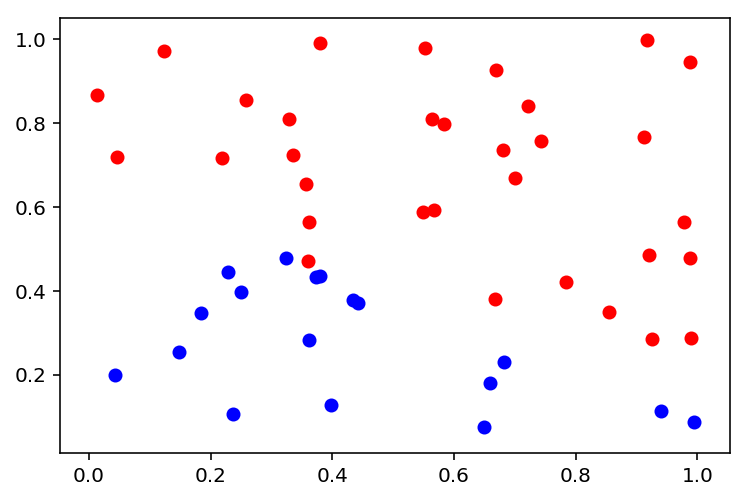

In [3]:
xy = np.random.rand(50, 2)
labels = np.zeros((len(xy), 1))
labels[-3./5. + 1./2. * xy[:, 0] + 0.9 * xy[:, 1] > 0, 0] = 1

plot_scatter(None, xy, labels)

## Binary Classification Loss Function : Cross Entropy
$$
\min_{W,b} \frac{1}{m}\sum_{i=1}^m -y_i \log(\hat{y_i})-(1-y_i) \log(1-\hat{y_i})$$    


where $\hat{y_i} = \sigma(x_i W + b)$

### 1. Binary Classification with sigmoid with Bias

In [4]:
features = np.array([[xval, yval] for xval, yval in xy])

x = tf.placeholder(tf.float32, shape=(None, 2))
y = tf.placeholder(tf.float32, shape=(None, 1))

W = tf.Variable(tf.ones([2, 1]), dtype=tf.float32)
b = tf.Variable(tf.ones([1]), dtype=tf.float32)

model = tf.nn.sigmoid(tf.matmul(x, W) + b)

loss = tf.reduce_mean(-y*tf.log(model) - (1-y)*tf.log(1-model))

lr = 0.1
MaxEpochs = 200
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    out = sess.run([model, loss], feed_dict={x: features, y: labels})
    for epoch in range(1, MaxEpochs + 1):
        if epoch % 50 == 0:
            curr_b, curr_W, curr_loss = sess.run([b, W, loss], feed_dict={x: features, y:labels})
            print(epoch, curr_b.flatten(), curr_W.flatten(), curr_loss)
        sess.run(train, feed_dict={x:features, y:labels})
    curr_b, curr_W = sess.run([b, W])
W_gd = curr_W.flatten()
b_gd = curr_b.flatten()

Instructions for updating:
Colocations handled automatically by placer.
50 [-1.7688972] [1.0503602 3.8952153] 0.3679527
100 [-3.848498] [2.5884826 6.6179957] 0.25445908
150 [-5.375569] [3.7363799 8.702906 ] 0.2025177
200 [-6.6241283] [ 4.6752553 10.449802 ] 0.17177454


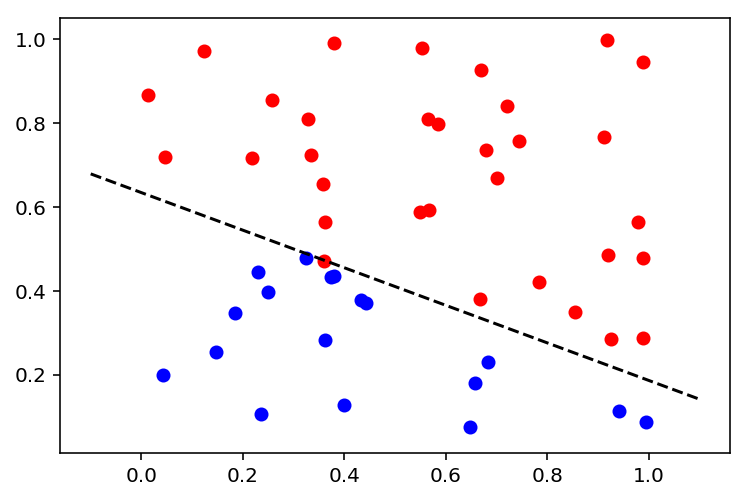

In [5]:
plot_scatter(np.append(b_gd, W_gd), xy, labels)

### 2. Binary Classification with sigmoid without Bias

In [6]:
features = np.array([[1.0, xval, yval] for xval, yval in xy])

x = tf.placeholder(tf.float32, shape=(None, 3))
y = tf.placeholder(tf.float32, shape=(None, 1))

W = tf.Variable(tf.ones([3, 1]), dtype=tf.float32)
b = tf.Variable(tf.ones([1]), dtype=tf.float32)

model = tf.nn.sigmoid(tf.matmul(x, W))

loss = tf.reduce_mean(-y*tf.log(model) - (1-y)*tf.log(1-model))

lr = 0.1
MaxEpochs = 200
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    out = sess.run([model, loss], feed_dict={x: features, y: labels})
    for epoch in range(1, MaxEpochs + 1):
        if epoch % 50 == 0:
            curr_b, curr_W, curr_loss = sess.run([b, W, loss], feed_dict={x: features, y:labels})
            print(epoch, curr_b.flatten(), curr_W.flatten(), curr_loss)
        sess.run(train, feed_dict={x:features, y:labels})
    curr_b, curr_W = sess.run([b, W])
W_gd = curr_W.flatten()
b_gd = curr_b.flatten()

50 [1.] [-1.7688974  1.0503603  3.8952155] 0.36795264
100 [1.] [-3.848498   2.5884829  6.6179957] 0.25445908
150 [1.] [-5.375569   3.7363799  8.702905 ] 0.20251772
200 [1.] [-6.6241283  4.6752553 10.449802 ] 0.17177454


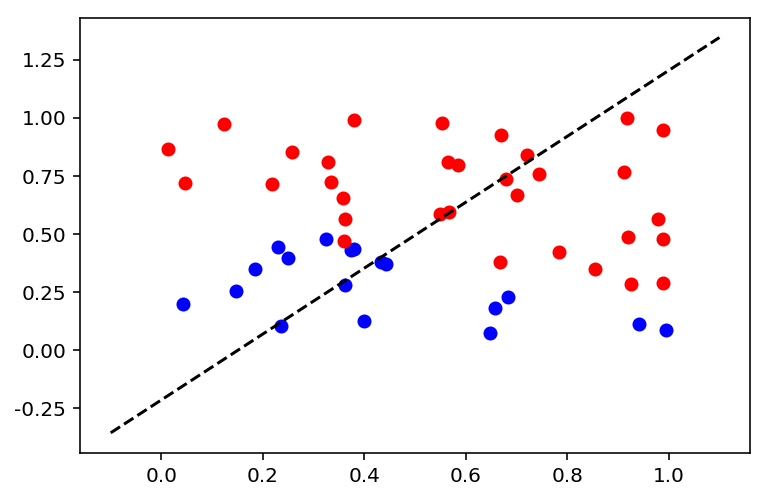

In [7]:
plot_scatter(np.append(b_gd, W_gd), xy, labels)

### 3. Binary Classification with Softmax without Logit

In [8]:
labels = np.zeros((len(xy),2))
labels[-4./5. +  3./4. * xy[:,0] + 1.0 * xy[:,1] > 0, 0] = 1.
labels[-4./5. +  3./4. * xy[:,0] + 1.0 * xy[:,1] <= 0, 1] = 1.

features = np.array([[xval, yval] for xval, yval in xy])

x = tf.placeholder(tf.float32, shape=(None, 2))
y = tf.placeholder(tf.float32, shape=(None, 2))

W = tf.Variable(tf.ones([2, 2]), dtype=tf.float32)
b = tf.Variable(tf.ones([2]), dtype=tf.float32)

model = tf.nn.softmax(tf.matmul(x, W) + b)

loss = tf.reduce_mean(tf.reduce_sum(-y * tf.log(model), 1))

In [9]:
lr = 1.0
MaxEpochs= 201
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

batch_size = 5
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    out = sess.run([model, loss], feed_dict={x: features, y: labels})
    for epoch in range(MaxEpochs):
        if epoch % 50 == 0 :
            curr_b, curr_W, curr_loss = sess.run([b, W, loss], feed_dict={x: features, y: labels})
            print(epoch, curr_b.flatten(), curr_W.flatten(), curr_loss)
        sess.run(train, feed_dict={x: features, y: labels})

    curr_b, curr_W = sess.run([b, W])
W_sgd = curr_W
b_sgd = curr_b

Instructions for updating:
Use tf.cast instead.
0 [1. 1.] [1. 1. 1. 1.] 0.6931472
50 [-4.853769   6.8537707] [ 6.745659  -4.7456584  8.006226  -6.006223 ] 0.11055415
100 [-6.9808183  8.9808235] [ 8.893916  -6.8939137 10.664506  -8.664504 ] 0.075102895
150 [-8.6970825 10.697087 ] [ 10.582056  -8.582053  12.772203 -10.7722  ] 0.057156716
200 [-10.191436   12.1914425] [ 12.048926  -10.0489235  14.611458  -12.611453 ] 0.045635432


In [10]:
def plot_scatter_softmax(curr_W, curr_b, xy, labels):
    x1 = np.linspace(-0.1, 1.1)
    X, Y = np.meshgrid(x1,x1)
    print(curr_W)
    Z1 = X * curr_W[0,0] + Y * curr_W[1,0] + curr_b[0]
    Z2 = X * curr_W[0,1] + Y * curr_W[1,1] + curr_b[1]
    Z = np.exp(Z2) / (np.exp(Z1) + np.exp(Z2))

    plt.figure(figsize=(5,5))
    cs = plt.contourf(X, Y, Z, np.linspace(0, 1, 11), cmap='coolwarm')
    plt.clabel(cs, colors='k')
    for k, color in [(0, 'b'), (1, 'r')]:
        idx = labels[:, k] == 1
        plt.scatter(xy[idx, 0], xy[idx, 1], c=color, edgecolors='k')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.show()

[[ 12.076477 -10.076474]
 [ 14.64606  -12.646055]]


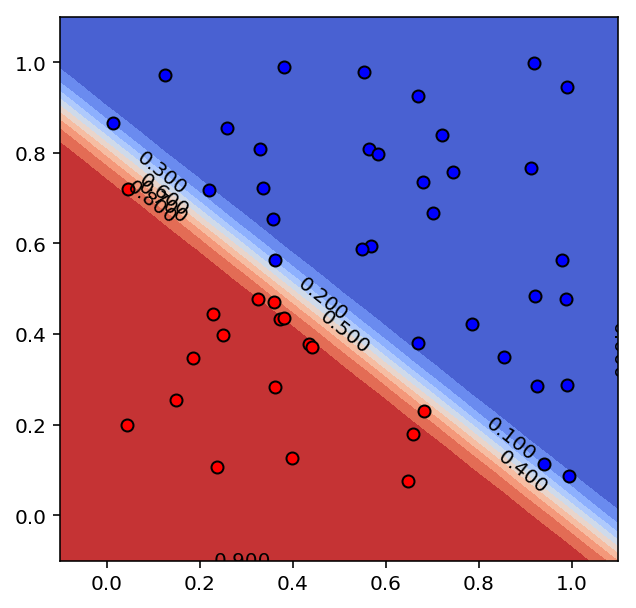

In [11]:
plot_scatter_softmax(W_sgd, b_sgd, xy, labels)

### 4. Binary Classification with Softmax with Logit

In [12]:
features = np.array([[xval, yval] for xval, yval in xy])

x = tf.placeholder(tf.float32, shape=(None, 2))
y = tf.placeholder(tf.float32, shape=(None, 2))

W = tf.Variable(tf.ones([2, 2]), dtype=tf.float32)
b = tf.Variable(tf.ones([2]), dtype=tf.float32)

logits = tf.matmul(x, W) + b

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=logits))

In [13]:
lr = 1.0
MaxEpochs= 201
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

batch_size = 5
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)    
    for epoch in range(MaxEpochs):
        if epoch % 50 == 0 :
            curr_b, curr_W, curr_loss = sess.run([b, W, loss], feed_dict={x: features, y: labels})
            print(epoch, curr_b.flatten(), curr_W.flatten(), curr_loss)
        sess.run(train, feed_dict={x: features, y: labels})

    curr_b, curr_W = sess.run([b, W])
W_sgd = curr_W
b_sgd = curr_b

0 [1. 1.] [1. 1. 1. 1.] 0.6931472
50 [-4.8537693  6.85377  ] [ 6.745658 -4.745658  8.006224 -6.006224] 0.11055417
100 [-6.9808216  8.980822 ] [ 8.893915 -6.893914 10.664504 -8.664508] 0.0751029
150 [-8.697087 10.697085] [ 10.582054  -8.582054  12.772201 -10.772203] 0.0571567
200 [-10.191437  12.191436] [ 12.0489235 -10.048923   14.611451  -12.611453 ] 0.045635443


[[ 12.076473 -10.076472]
 [ 14.646052 -12.646054]]


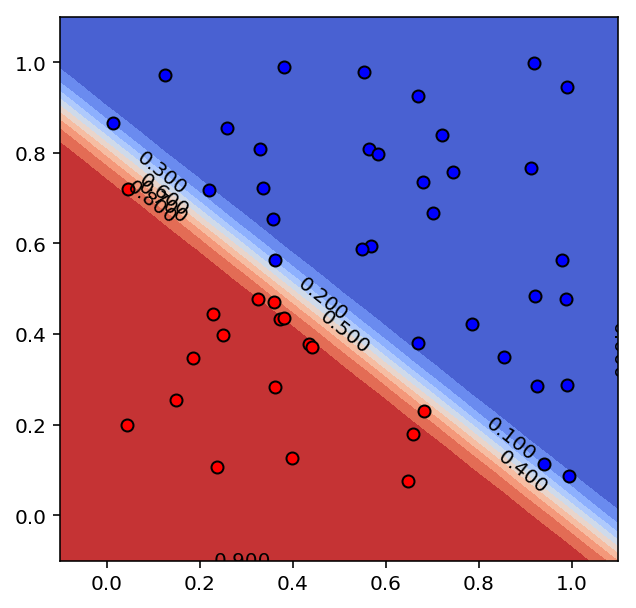

In [14]:
plot_scatter_softmax(W_sgd, b_sgd, xy, labels)